## Team Member
1) Meghan Channarukul (N01541988)

2) Deepa James (N01531547)

3) Namitha Jos (N01512098)

4) Reshma Kunnummakkara Surendran (N01530618)

5) Ophelia Chen (N01548827)

In [1]:
#Import package

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostRegressor

from dmba import regressionSummary
from dmba import backward_elimination, forward_selection, stepwise_selection, exhaustive_search

from itertools import combinations

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

no display found. Using non-interactive Agg backend


In [2]:
#Load & display diamond dataset

diamond_df = pd.read_csv('diamonds.csv')
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#Display data type

diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
#Display data describe

diamond_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
#Drop 1st column of dataset, due to it's no. of row & unnamed column

diamond_df = diamond_df.drop('Unnamed: 0', axis = 1)

In [6]:
#Dropping dimentionless diamonds -- since its dimension is zero, there're faulty values.

diamond_df = diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["z"]==0].index)

diamond_df.shape

(53920, 10)

In [7]:
#Create new column for diamond size -- size

diamond_df['size'] = diamond_df['x'] * diamond_df['y'] * diamond_df['z'] 

In [8]:
#Create a list of column names excluding 'price'
columns_without_price = [col for col in diamond_df.columns if col != 'price']

#Rearrange columns to move 'price' to the last position
new_column_order = columns_without_price + ['price']

#Create a new DataFrame with columns arranged in the new order
diamond_df = diamond_df[new_column_order]

diamond_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,size,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,38.202030,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,34.505856,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,38.076885,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,46.724580,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,51.917250,335


In [9]:
#Display statistics value -- after removing dimensional diamonds equal 0 out of dataset

diamond_df.describe()

,carat,depth,table,x,y,z,size,price
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,5.731627,5.734887,3.540046,129.897567,3930.993231
std,0.473795,1.432331,2.234064,1.119423,1.140126,0.702530,78.219789,3987.280446
min,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000,31.707984,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,65.189759,949.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,114.840180,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,170.846415,5323.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,3840.598060,18823.000000


### Visualizing dataset to analyze pattern in dataset

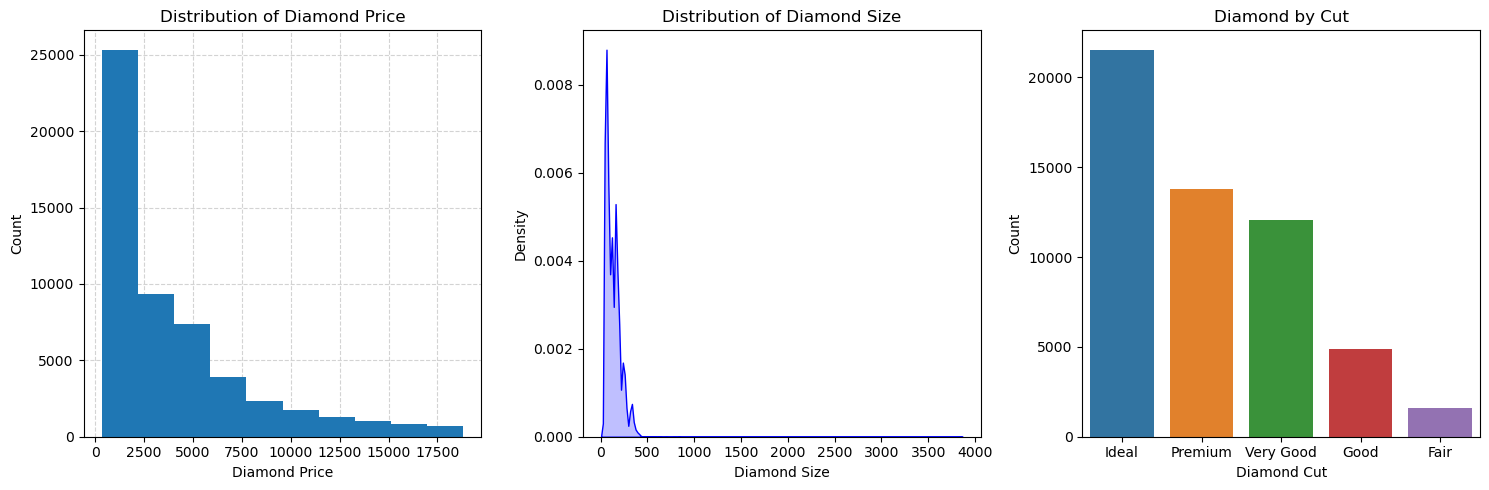

In [10]:
# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First subplot: Distribution of Diamond Price
axs[0].hist(diamond_df.price)
axs[0].set_axisbelow(True)
axs[0].grid(which='major', color='lightgrey', linestyle='--')
axs[0].set_xlabel('Diamond Price')
axs[0].set_ylabel('Count')
axs[0].set_title('Distribution of Diamond Price')

# Second subplot: Distribution of Diamond Size
sns.kdeplot(diamond_df['size'], fill=True, color="b", ax=axs[1])
axs[1].set_xlabel("Diamond Size")
axs[1].set_ylabel("Density")
axs[1].set_title("Distribution of Diamond Size")

# Third subplot: No. of diamonds by cut
custom_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
sns.countplot(data=diamond_df, x='cut', order=custom_order, ax=axs[2])
axs[2].set_xlabel("Diamond Cut")
axs[2].set_ylabel("Count")
axs[2].set_title("Diamond by Cut")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

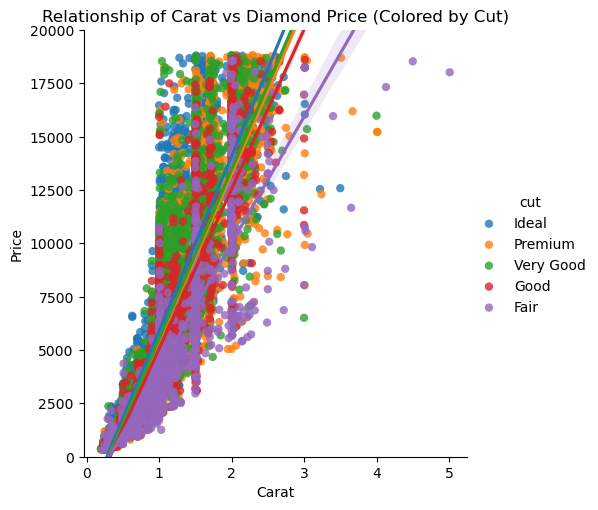

In [11]:
#Analyze the relationship between the carat and the diamond price (colored by cut)

#Define the order of the legend labels (cuts)
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#Use lmplot with hue_order to control the order of the legend labels
sns.lmplot(data = diamond_df, x = 'carat', y = 'price', hue = 'cut', hue_order = cut_order, scatter_kws = {"edgecolor": 'none'})
plt.xlabel('Carat')
plt.ylabel('Price')
plt.ylim(0, 20000)

plt.title('Relationship of Carat vs Diamond Price (Colored by Cut)')
plt.show()

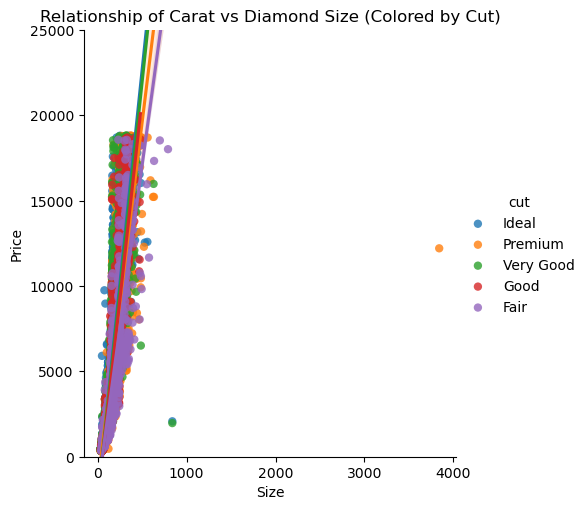

In [12]:
#Analyze the relationship between the diamond size and price (colored by cut)

#Define the order of the legend labels (cuts)
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#Use lmplot with hue_order to control the order of the legend labels
sns.lmplot(data=diamond_df, x='size', y='price', hue='cut', hue_order=cut_order, scatter_kws={"edgecolor": 'none'})
plt.xlabel('Size')
plt.ylabel('Price')
plt.ylim(0, 25000)

plt.title('Relationship of Carat vs Diamond Size (Colored by Cut)')
plt.show()

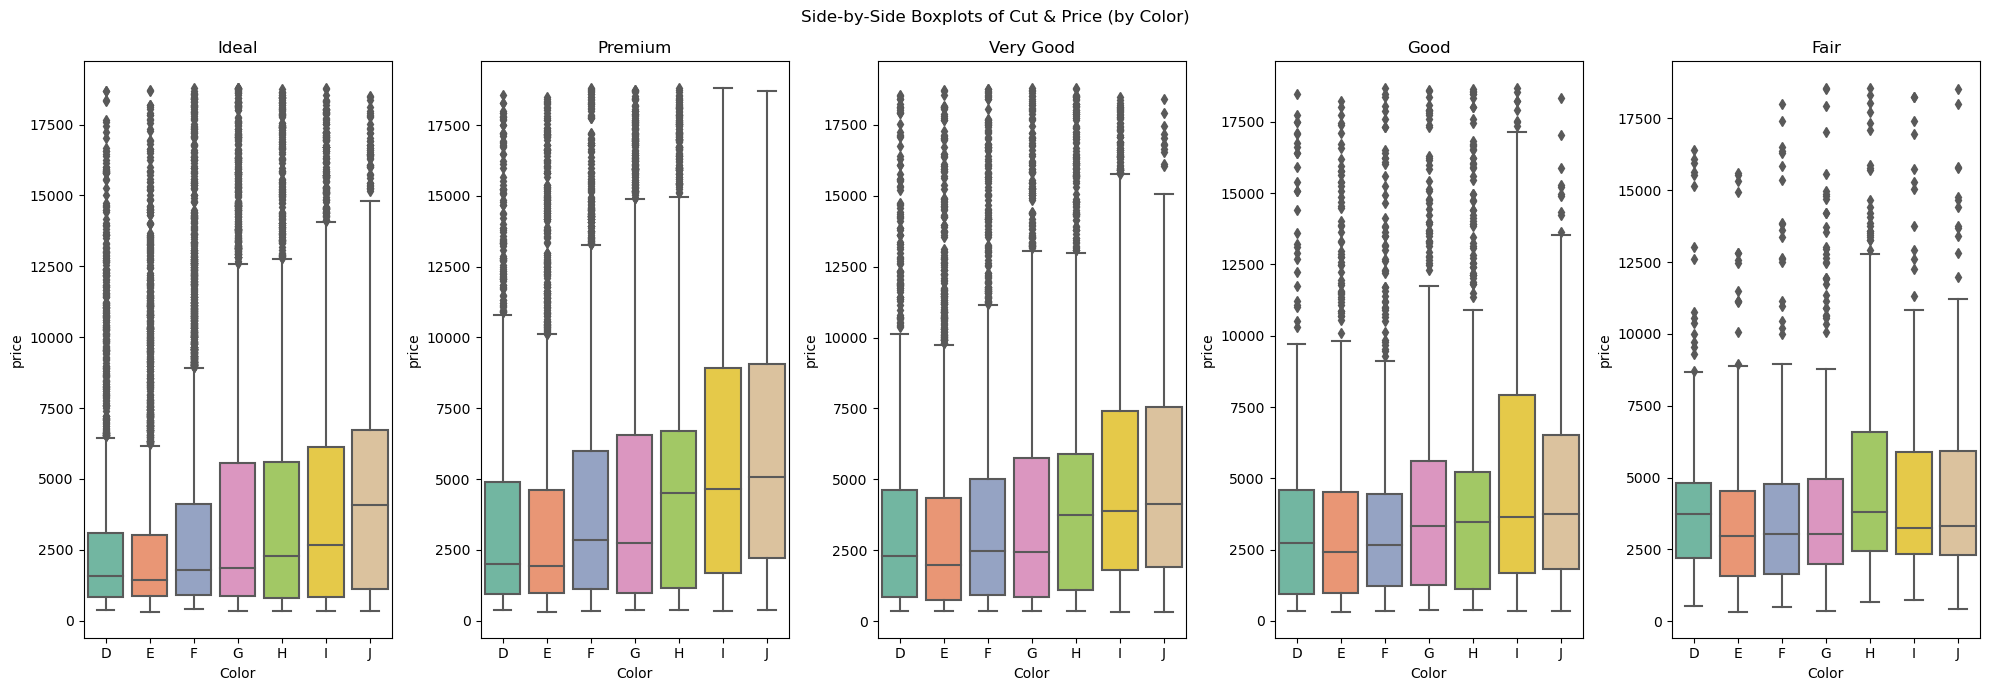

In [13]:
#Display side-by-side boxplots -- Cut & Price (by color)

#Define cuts
cuts = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#Order colors
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']

#Create side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(cuts), figsize=(20, 7))
colors = sns.color_palette("Set2")

#Iterate through cuts
for i, cut in enumerate(cuts):
    #Filter data for each cut
    cut_data = diamond_df[diamond_df['cut'] == cut]
    
    #Create boxplot for each cut
    sns.boxplot(data=cut_data, x='color', y='price', ax=axes[i], palette=colors, order=color_order)
    axes[i].set_title(cut)
    axes[i].set_xlabel('Color')

plt.suptitle('Side-by-Side Boxplots of Cut & Price (by Color)')
plt.tight_layout()
plt.show()

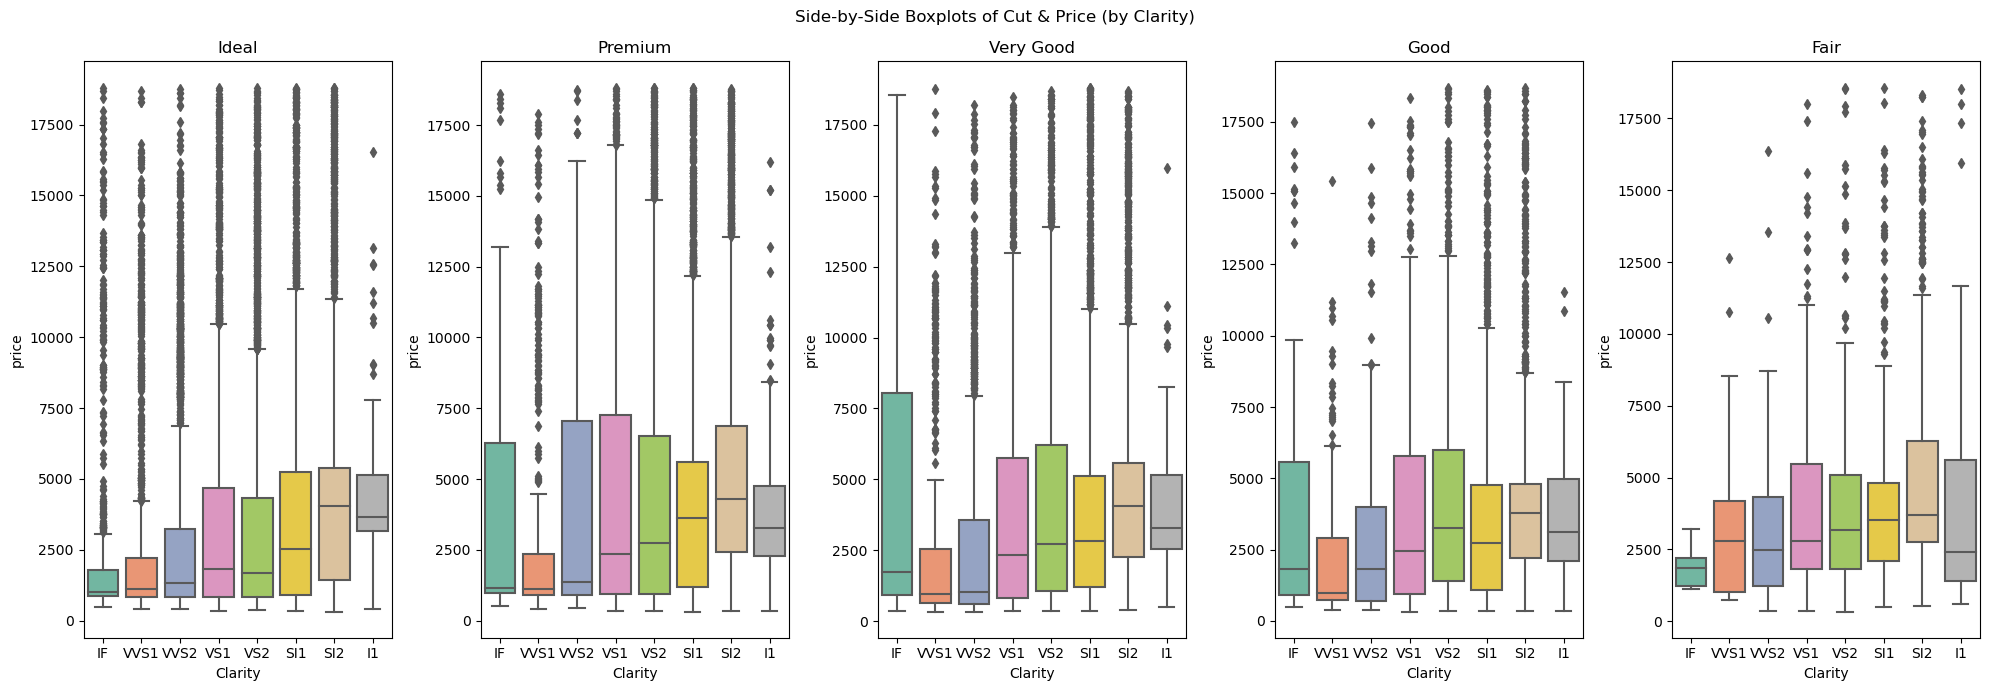

In [14]:
#Display side-by-side boxplots -- Cut & Price (by clarity)

#Define cuts
cuts = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

#Order clarity
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

#Create side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(cuts), figsize=(20, 7))
colors = sns.color_palette("Set2")

#Iterate through cuts
for i, cut in enumerate(cuts):
    #Filter data for each cut
    cut_data = diamond_df[diamond_df['cut'] == cut]
    
    #Create boxplot for each cut
    sns.boxplot(data=cut_data, x='clarity', y='price', ax=axes[i], palette=colors, order=clarity_order)
    axes[i].set_title(cut)
    axes[i].set_xlabel('Clarity')

plt.suptitle('Side-by-Side Boxplots of Cut & Price (by Clarity)')
plt.tight_layout()
plt.show()

In [15]:
# Create a LabelEncoder for each column

#Copy dataset to diamondEncode_df
diamondEncode_df = diamond_df.copy()

# Specify the columns to be label encoded
encode_columns = ['cut', 'color', 'clarity']

label_encoders = {}

for column in encode_columns:
    if column in diamondEncode_df.columns:  #Check if the column exists
        label_encoders[column] = LabelEncoder()
        diamondEncode_df[column] = label_encoders[column].fit_transform(diamondEncode_df[column])
    else:
        print(f"Column '{column}' not found in DataFrame.")

# Print the updated DataFrame information
diamondEncode_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int64  
 2   color    53920 non-null  int64  
 3   clarity  53920 non-null  int64  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   x        53920 non-null  float64
 7   y        53920 non-null  float64
 8   z        53920 non-null  float64
 9   size     53920 non-null  float64
 10  price    53920 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 4.9 MB


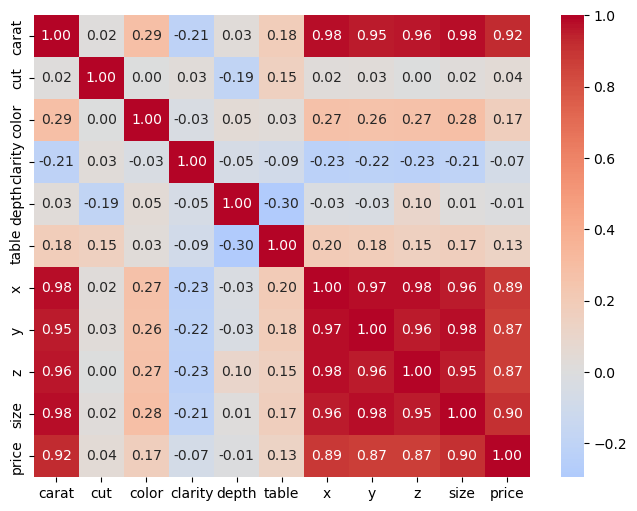

In [16]:
#Display correlation -- heatmap
corr = diamondEncode_df.corr()

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "coolwarm", center = 0, ax = ax)
plt.show()

### Data pre-processing

In [17]:
#Convert column: cut, color, and clarity from categorical to numerical data

diamond_df['cut'] = diamond_df['cut'].map({'Ideal': 0, 'Premium': 1, 'Very Good': 2, 'Good': 3, 'Fair': 4})
diamond_df['color'] = diamond_df['color'].map({'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6})
diamond_df['clarity'] = diamond_df['clarity'].map({'IF': 0, 'VVS1': 1, 'VVS2': 2, 'VS1': 3, 'VS2': 4, 'SI1': 5, 'SI2': 6, 'I1': 7})

diamond_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,size,price
0,0.23,0,1,6,61.5,55.0,3.95,3.98,2.43,38.202030,326
1,0.21,1,1,5,59.8,61.0,3.89,3.84,2.31,34.505856,326
2,0.23,3,1,3,56.9,65.0,4.05,4.07,2.31,38.076885,327
3,0.29,1,5,4,62.4,58.0,4.20,4.23,2.63,46.724580,334
4,0.31,3,6,6,63.3,58.0,4.34,4.35,2.75,51.917250,335


In [18]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  int64  
 2   color    53920 non-null  int64  
 3   clarity  53920 non-null  int64  
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   x        53920 non-null  float64
 7   y        53920 non-null  float64
 8   z        53920 non-null  float64
 9   size     53920 non-null  float64
 10  price    53920 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 4.9 MB


In [19]:
#Random only 5000 records for training model

train_subset = diamond_df.sample(n=5000, random_state=42)

train_subset.head()

,carat,cut,color,clarity,depth,table,x,y,z,size,price
34704,0.31,1,2,0,60.8,59.0,4.36,4.39,2.66,50.913464,874
21099,1.29,0,4,3,61.8,56.0,6.97,7.02,4.32,211.375008,9273
23685,1.52,1,2,5,62.6,59.0,7.36,7.27,4.58,245.062976,11743
39200,0.41,3,2,2,63.6,56.0,4.72,4.68,2.99,66.047904,1064
35560,0.35,1,3,3,61.5,58.0,4.54,4.50,2.78,56.795400,906


In [20]:
#Partition data into predictors (X) and output (y)

predictors = ['carat', 'cut', 'color', 'clarity', 'depth', 'table','x','y','z','size']
outcome = ['price']

X = pd.get_dummies(train_subset[predictors], drop_first = True)
y = train_subset[outcome]

In [21]:
#Display X

X.head()

,carat,cut,color,clarity,depth,table,x,y,z,size
34704,0.31,1,2,0,60.8,59.0,4.36,4.39,2.66,50.913464
21099,1.29,0,4,3,61.8,56.0,6.97,7.02,4.32,211.375008
23685,1.52,1,2,5,62.6,59.0,7.36,7.27,4.58,245.062976
39200,0.41,3,2,2,63.6,56.0,4.72,4.68,2.99,66.047904
35560,0.35,1,3,3,61.5,58.0,4.54,4.50,2.78,56.795400


In [22]:
#Display y

y.head()

,price
34704,874
21099,9273
23685,11743
39200,1064
35560,906


In [23]:
#Split the data into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model

def adjusted_r2_score(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    n_samples = len(y_true)
    adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)
    return adjusted_r2

def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    return -adjusted_r2_score(train_y, pred_y, len(variables))

def AIC_score(y_true, y_pred, model):
    n = len(y_true)
    k = model.coef_.shape[0] + 1  # number of parameters including intercept
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    AIC = n * np.log(residual_sum_of_squares / n) + 2 * k
    return AIC

allVariables = train_X.columns

def exhaustive_search(all_variables, train_model, score_model):
    best_results = []
    
    for k in range(1, len(all_variables)+1):
        variable_combinations = combinations(all_variables, k)
        
        for variables in variable_combinations:
            model = train_model(variables)
            score = score_model(model, variables)
            best_results.append({'variables': variables, 'score': score, 'model': model})
    
    return best_results

results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {'n': len(variables), 'r2adj': -result['score'], 'AIC':AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
result_df = pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))
result_df['AIC'] = result_df['AIC'].astype(float)
result_df = result_df.drop_duplicates(subset=['n'], keep='first')  # Keep only the first occurrence of each 'n'
result_df.head(10)

,n,r2adj,AIC,carat,clarity,color,cut,depth,size,table,x,y,z
0,1,0.864095,50974.365947,True,False,False,False,False,False,False,False,False,False
10,2,0.868891,50847.607443,True,False,False,True,False,False,False,False,False,False
55,3,0.877702,50603.126773,True,False,True,True,False,False,False,False,False,False
175,4,0.916753,49255.864638,True,True,True,True,False,False,False,False,False,False
385,5,0.916933,49247.256768,True,True,True,True,True,False,False,False,False,False
637,6,0.917144,49237.368732,True,True,True,True,True,False,True,False,False,False
847,7,0.922930,48982.996744,True,True,True,True,True,False,True,True,False,False
967,8,0.922916,48982.652092,True,True,True,True,True,False,True,True,True,False
1012,9,0.922937,48980.676121,True,True,True,True,True,False,True,True,True,True
1022,10,0.923830,48938.867968,True,True,True,True,True,True,True,True,True,True


### Model1: Linear Regression

In [25]:
##Build Linear Regression (LR) model based on the training data

diamond_LR = LinearRegression()
diamond_LR.fit(train_X, train_y)

LinearRegression()

In [26]:
#Extract column names as a list
columns = list(X.columns)

#Extract coefficients and feature names
coefficients = diamond_LR.coef_[0]  
columns = train_X.columns

# Create DataFrame for coefficients
print(pd.DataFrame({'Predictor': columns, 'Coefficient': coefficients}))

#Print Performance Measures (training data)
regressionSummary(train_y, diamond_LR.predict(train_X))

# Calculate performance metrics (training data)
mse_trainLR = mean_squared_error(train_y, diamond_LR.predict(train_X))
r2_trainLR = r2_score(train_y, diamond_LR.predict(train_X))

print(f"Mean Squared Error (MSE): {mse_trainLR}")
print(f"R-squared (R2): {r2_trainLR}")

  Predictor  Coefficient
0     carat  5057.568562
1       cut   -79.209427
2     color  -301.148193
3   clarity  -487.974805
4     depth  -126.958766
5     table   -14.191652
6         x  -759.364349
7         y -1308.769010
8         z   922.225780
9      size    44.769504

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1086.4768
            Mean Absolute Error (MAE) : 730.3614
          Mean Percentage Error (MPE) : 5.8557
Mean Absolute Percentage Error (MAPE) : 40.0773
Mean Squared Error (MSE): 1180431.783658301
R-squared (R2): 0.9240480287558295


In [27]:
#Use predict() to make predictions on a validation
predictionLR = diamond_LR.predict(valid_X).flatten()
valid_y = valid_y.values.flatten()

result = pd.DataFrame({'Predicted' : predictionLR, 'Actual' : valid_y, 'Residual' : valid_y - predictionLR})
result.head()

,Predicted,Actual,Residual
0,1235.374660,1092,-143.374660
1,3422.006844,3611,188.993156
2,2716.364370,2723,6.635630
3,3149.371968,2745,-404.371968
4,5876.809881,6816,939.190119


In [28]:
Q1 = result['Residual'].quantile(0.25)
Q3 = result['Residual'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower bound is:', lower_bound, 'and the Upper bound is:', upper_bound)

Lower bound is: -1971.9382670150271 and the Upper bound is: 1879.6352919772087


0.9553333333333334


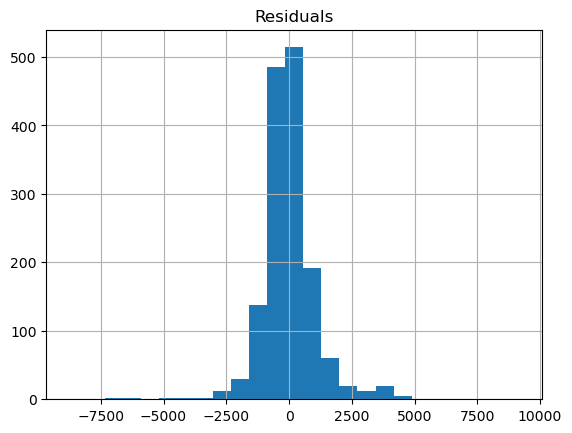

In [29]:
#Validation Error - Evaluate Performance

all_residuals = valid_y - predictionLR

#Determine the percentage of datapoint with a residual in [-2500, 2500] --> 95%
print(len(all_residuals[(all_residuals > -2500) & (all_residuals < 2500)]) / len(all_residuals))

pd.DataFrame({'Residuals' : all_residuals}).hist(bins = 25)
plt.show()

In [30]:
#For Linear Regression (LR) model -- Make predictions on a validation dataset

#Calculate performance metrics (Validation Data)
r2LR = r2_score(valid_y, predictionLR)
mseLR = mean_squared_error(valid_y, predictionLR)
maeLR = mean_absolute_error(valid_y, predictionLR)
mapeLR = mean_absolute_percentage_error(valid_y, predictionLR)
cv_scores_LR = cross_val_score(diamond_LR, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_LR = np.mean(cv_scores_LR)

print(f"R-squared (R2): {r2LR}")
print(f"Mean Squared Error (MSE): {mseLR}")
print(f"Mean Absolute Error (MAE): {maeLR}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeLR}")
print("Cross-Validation R^2 for Linear Regression:", cv_r2_LR)

R-squared (R2): 0.9134679842890003
Mean Squared Error (MSE): 1314185.2699695085
Mean Absolute Error (MAE): 731.6298081311135
Mean Absolute Percentage Error (MAPE): 0.39745585114904997
Cross-Validation R^2 for Linear Regression: 0.8445844000884465


### Model2: Random Forest Regression

In [31]:
#Build Random Forest (RF) model based on the training data

diamond_RF = RandomForestClassifier(n_estimators=100, random_state = 0)
diamond_RF.fit(train_X, train_y)

RandomForestClassifier(random_state=0)

In [32]:
#Print Performance Measures (training data)
regressionSummary(train_y, diamond_RF.predict(train_X))

#Calculate performance metrics (training data)
mse_trainRF = mean_squared_error(train_y, diamond_RF.predict(train_X))
r2_trainRF = r2_score(train_y, diamond_RF.predict(train_X))

print(f"Mean Squared Error (MSE): {mse_trainRF}")
print(f"R-squared (R2): {r2_trainRF}")


Regression statistics

                      Mean Error (ME) : -0.0714
       Root Mean Squared Error (RMSE) : 3.5095
            Mean Absolute Error (MAE) : 0.0714
          Mean Percentage Error (MPE) : -0.0038
Mean Absolute Percentage Error (MAPE) : 0.0038
Mean Squared Error (MSE): 12.316571428571429
R-squared (R2): 0.9999992075205938


In [33]:
#For Random Forest (RF) -- Make predictions on a validation dataset
predictionRF = diamond_RF.predict(valid_X)

#Calculate performance metrics (Validation Data)
r2RF = r2_score(valid_y, predictionRF)
mseRF = mean_squared_error(valid_y, predictionRF)
maeRF = mean_absolute_error(valid_y, predictionRF)
mapeRF = mean_absolute_percentage_error(valid_y, predictionRF)
cv_scores_RF = cross_val_score(diamond_RF, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_RF = np.mean(cv_scores_RF)

print(f"R-squared (R2): {r2RF}")
print(f"Mean Squared Error (MSE): {mseRF}")
print(f"Mean Absolute Error (MAE): {maeRF}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeRF}")
print("Cross-Validation R^2 for Random Forest Regression:", cv_r2_RF)

R-squared (R2): 0.9040498604238028
Mean Squared Error (MSE): 1457220.88
Mean Absolute Error (MAE): 639.9053333333334
Mean Absolute Percentage Error (MAPE): 0.15953824914322912
Cross-Validation R^2 for Random Forest Regression: 0.8922393515966842


### Model3: K-Neighbors Regression

In [34]:
#Normalizing data -- For K-Neighbors Regression (KNR)

scaler = StandardScaler()

X = scaler.fit_transform(train_subset.drop(['price'], axis = 1))
y = scaler.fit_transform(train_subset[['price']])

In [35]:
#Display shape of dataset

train_subset.shape, X.shape, y.shape

((5000, 11), (5000, 10), (5000, 1))

In [36]:
#Creating K-Neighbors Regression (KNR) model with default setting first

diamond_KNR = KNeighborsRegressor()
diamond_KNR.fit(train_X, train_y)

KNeighborsRegressor()

In [37]:
#Print Performance Measures (training data)
regressionSummary(train_y, diamond_KNR.predict(train_X))

#Calculate performance metrics (training data)
mse_trainKNR = mean_squared_error(train_y, diamond_KNR.predict(train_X))
r2_trainKNR = r2_score(train_y, diamond_KNR.predict(train_X))

print(f"Mean Squared Error (MSE): {mse_trainKNR}")
print(f"R-squared (R2): {r2_trainKNR}")


Regression statistics

                      Mean Error (ME) : -22.4066
       Root Mean Squared Error (RMSE) : 785.0838
            Mean Absolute Error (MAE) : 406.9553
          Mean Percentage Error (MPE) : -3.2886
Mean Absolute Percentage Error (MAPE) : 10.4744
Mean Squared Error (MSE): 616356.5726742856
R-squared (R2): 0.9603420567524604


In [38]:
#For k-NeighborsRegressor (KNR) -- Make predictions on a validation dataset
predictionKNR = diamond_KNR.predict(valid_X)

#Calculate performance metrics (Validation Data)
r2KNR = r2_score(valid_y, predictionKNR)
mseKNR = mean_squared_error(valid_y, predictionKNR)
maeKNR = mean_absolute_error(valid_y, predictionKNR)
mapeKNR = mean_absolute_percentage_error(valid_y, predictionKNR)
cv_scores_KNR = cross_val_score(diamond_KNR, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_KNR = np.mean(cv_scores_KNR)

print(f"R-squared (R2): {r2KNR}")
print(f"Mean Squared Error (MSE): {mseKNR}")
print(f"Mean Absolute Error (MAE): {maeKNR}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeKNR}")
print("Cross-Validation R^2 for K-Neighbours Regression:", cv_r2_KNR)

R-squared (R2): 0.9383465259853089
Mean Squared Error (MSE): 936348.0872
Mean Absolute Error (MAE): 500.67120000000006
Mean Absolute Percentage Error (MAPE): 0.12874629107246532
Cross-Validation R^2 for K-Neighbours Regression: 0.9332233176021054


### Model4: CatBoost Regression

In [39]:
#Creating CatBoost Regression (CBR) model with default setting first

diamond_CBR = CatBoostRegressor()
diamond_CBR.fit(train_X, train_y)

Learning rate set to 0.049905
0:	learn: 3779.7118043	total: 57.8ms	remaining: 57.7s
1:	learn: 3620.7221213	total: 58.7ms	remaining: 29.3s
2:	learn: 3468.1127822	total: 59.8ms	remaining: 19.9s
3:	learn: 3328.2160087	total: 60.9ms	remaining: 15.2s
4:	learn: 3195.7809624	total: 61.8ms	remaining: 12.3s
5:	learn: 3068.7692008	total: 62.6ms	remaining: 10.4s
6:	learn: 2944.8439190	total: 64.2ms	remaining: 9.11s
7:	learn: 2826.3314214	total: 65ms	remaining: 8.06s
8:	learn: 2716.4138679	total: 65.8ms	remaining: 7.24s
9:	learn: 2605.9806388	total: 66.6ms	remaining: 6.59s
10:	learn: 2510.1163964	total: 67.5ms	remaining: 6.07s
11:	learn: 2410.5082654	total: 68.4ms	remaining: 5.63s
12:	learn: 2316.8471234	total: 69.3ms	remaining: 5.26s
13:	learn: 2233.7105808	total: 70.3ms	remaining: 4.95s
14:	learn: 2151.2870459	total: 71ms	remaining: 4.66s
15:	learn: 2071.3738549	total: 71.9ms	remaining: 4.42s
16:	learn: 1995.7238673	total: 72.7ms	remaining: 4.2s
17:	learn: 1922.8699534	total: 73.4ms	remaining: 4

176:	learn: 490.8536641	total: 188ms	remaining: 873ms
177:	learn: 490.2980368	total: 189ms	remaining: 871ms
178:	learn: 489.3458799	total: 189ms	remaining: 869ms
179:	learn: 488.2854437	total: 190ms	remaining: 866ms
180:	learn: 487.3902975	total: 191ms	remaining: 864ms
181:	learn: 486.6449049	total: 192ms	remaining: 861ms
182:	learn: 485.9727436	total: 192ms	remaining: 859ms
183:	learn: 485.6170184	total: 193ms	remaining: 857ms
184:	learn: 484.2631498	total: 194ms	remaining: 855ms
185:	learn: 483.2254200	total: 195ms	remaining: 853ms
186:	learn: 482.7762278	total: 196ms	remaining: 853ms
187:	learn: 481.9632103	total: 197ms	remaining: 851ms
188:	learn: 481.3063508	total: 198ms	remaining: 848ms
189:	learn: 480.5122308	total: 198ms	remaining: 845ms
190:	learn: 479.6241046	total: 199ms	remaining: 844ms
191:	learn: 478.0815350	total: 200ms	remaining: 842ms
192:	learn: 477.3715565	total: 201ms	remaining: 840ms
193:	learn: 476.8690346	total: 202ms	remaining: 838ms
194:	learn: 476.1913315	tota

339:	learn: 402.8748018	total: 304ms	remaining: 591ms
340:	learn: 402.5513677	total: 305ms	remaining: 590ms
341:	learn: 401.9255369	total: 306ms	remaining: 589ms
342:	learn: 401.8193017	total: 307ms	remaining: 587ms
343:	learn: 401.5825243	total: 307ms	remaining: 586ms
344:	learn: 401.0707971	total: 308ms	remaining: 584ms
345:	learn: 400.4712571	total: 308ms	remaining: 583ms
346:	learn: 400.1460967	total: 309ms	remaining: 581ms
347:	learn: 399.8553078	total: 310ms	remaining: 580ms
348:	learn: 399.4995310	total: 310ms	remaining: 579ms
349:	learn: 399.0611413	total: 311ms	remaining: 578ms
350:	learn: 398.7775236	total: 312ms	remaining: 577ms
351:	learn: 398.5815740	total: 313ms	remaining: 576ms
352:	learn: 398.4739191	total: 313ms	remaining: 574ms
353:	learn: 398.0139363	total: 314ms	remaining: 573ms
354:	learn: 397.5362798	total: 315ms	remaining: 572ms
355:	learn: 397.4091811	total: 316ms	remaining: 571ms
356:	learn: 397.1419862	total: 317ms	remaining: 570ms
357:	learn: 396.7849609	tota

617:	learn: 329.0304719	total: 500ms	remaining: 309ms
618:	learn: 328.6335202	total: 501ms	remaining: 308ms
619:	learn: 328.2934377	total: 501ms	remaining: 307ms
620:	learn: 328.1038751	total: 502ms	remaining: 306ms
621:	learn: 328.0247171	total: 503ms	remaining: 305ms
622:	learn: 327.8653286	total: 503ms	remaining: 305ms
623:	learn: 327.8149142	total: 504ms	remaining: 304ms
624:	learn: 327.6425585	total: 505ms	remaining: 303ms
625:	learn: 327.4589988	total: 505ms	remaining: 302ms
626:	learn: 327.3668822	total: 506ms	remaining: 301ms
627:	learn: 327.2272787	total: 506ms	remaining: 300ms
628:	learn: 327.0602617	total: 507ms	remaining: 299ms
629:	learn: 326.7930471	total: 508ms	remaining: 298ms
630:	learn: 326.5184156	total: 509ms	remaining: 297ms
631:	learn: 326.4510973	total: 509ms	remaining: 296ms
632:	learn: 326.3283631	total: 510ms	remaining: 296ms
633:	learn: 326.1525882	total: 511ms	remaining: 295ms
634:	learn: 325.9449685	total: 511ms	remaining: 294ms
635:	learn: 325.6166754	tota

872:	learn: 283.4837037	total: 689ms	remaining: 100ms
873:	learn: 283.3366873	total: 690ms	remaining: 99.4ms
874:	learn: 283.2475541	total: 691ms	remaining: 98.7ms
875:	learn: 283.1232325	total: 691ms	remaining: 97.9ms
876:	learn: 282.9272959	total: 692ms	remaining: 97ms
877:	learn: 282.7556369	total: 693ms	remaining: 96.2ms
878:	learn: 282.5352727	total: 693ms	remaining: 95.4ms
879:	learn: 282.4142987	total: 694ms	remaining: 94.6ms
880:	learn: 282.2755863	total: 695ms	remaining: 93.8ms
881:	learn: 282.0670483	total: 695ms	remaining: 93ms
882:	learn: 281.9498299	total: 696ms	remaining: 92.2ms
883:	learn: 281.8319960	total: 697ms	remaining: 91.4ms
884:	learn: 281.7307109	total: 698ms	remaining: 90.6ms
885:	learn: 281.5491148	total: 698ms	remaining: 89.8ms
886:	learn: 281.2555153	total: 699ms	remaining: 89ms
887:	learn: 281.1449453	total: 700ms	remaining: 88.2ms
888:	learn: 281.0963048	total: 700ms	remaining: 87.4ms
889:	learn: 281.0068561	total: 701ms	remaining: 86.7ms
890:	learn: 280.9

In [40]:
#Fit the CBR model on the training data

diamond_CBR.fit(train_X, train_y, eval_set=(valid_X, valid_y), early_stopping_rounds=50, verbose=100)

Learning rate set to 0.061989
0:	learn: 3740.5457013	test: 3696.7143841	best: 3696.7143841 (0)	total: 1.45ms	remaining: 1.45s
100:	learn: 541.9595487	test: 632.1076489	best: 632.1076489 (100)	total: 75.6ms	remaining: 673ms
200:	learn: 440.6967433	test: 593.2759835	best: 592.6646230 (196)	total: 145ms	remaining: 576ms
300:	learn: 393.6825749	test: 587.4353709	best: 587.4353709 (300)	total: 215ms	remaining: 499ms
400:	learn: 353.8339652	test: 584.3838729	best: 584.3838729 (400)	total: 284ms	remaining: 424ms
500:	learn: 327.5628386	test: 583.8263534	best: 583.1776534 (475)	total: 356ms	remaining: 354ms
Stopped by overfitting detector  (50 iterations wait)

bestTest = 583.1776534
bestIteration = 475

Shrink model to first 476 iterations.


In [41]:
#Print Performance Measures (training data)
regressionSummary(train_y, diamond_CBR.predict(train_X))

#Calculate performance metrics (training data)
mse_trainCBR = mean_squared_error(train_y, diamond_CBR.predict(train_X))
r2_trainCBR = r2_score(train_y, diamond_CBR.predict(train_X))

print(f"Mean Squared Error (MSE): {mse_trainCBR}")
print(f"R-squared (R2): {r2_trainCBR}")


Regression statistics

                      Mean Error (ME) : 0.0046
       Root Mean Squared Error (RMSE) : 333.1824
            Mean Absolute Error (MAE) : 211.0169
          Mean Percentage Error (MPE) : -0.9370
Mean Absolute Percentage Error (MAPE) : 7.3946
Mean Squared Error (MSE): 111010.49316814418
R-squared (R2): 0.9928573036564824


In [42]:
#For CatBoost Regression (CBR) model -- Make predictions on a validation dataset
predictionCBR = diamond_CBR.predict(valid_X)

#Calculate performance metrics (Validation Data)
r2CBR = r2_score(valid_y, predictionCBR)
mseCBR = mean_squared_error(valid_y, predictionCBR)
maeCBR = mean_absolute_error(valid_y, predictionCBR)
mapeCBR = mean_absolute_percentage_error(valid_y, predictionCBR)
cv_scores_CBR = cross_val_score(diamond_CBR, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_CBR = np.mean(cv_scores_CBR)

print(f"R-squared (R2): {r2CBR}")
print(f"Mean Squared Error (MSE): {mseCBR}")
print(f"Mean Absolute Error (MAE): {maeCBR}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeCBR}")
print("Cross-Validation R^2 for CatBoost Regression:", cv_r2_CBR)

Learning rate set to 0.048176
0:	learn: 3808.6813623	total: 1.97ms	remaining: 1.96s
1:	learn: 3654.2942355	total: 2.97ms	remaining: 1.48s
2:	learn: 3506.2391721	total: 3.72ms	remaining: 1.24s
3:	learn: 3367.6026409	total: 4.59ms	remaining: 1.14s
4:	learn: 3239.0997270	total: 5.29ms	remaining: 1.05s
5:	learn: 3115.3501887	total: 5.98ms	remaining: 991ms
6:	learn: 2993.8951329	total: 6.9ms	remaining: 979ms
7:	learn: 2883.8961924	total: 7.6ms	remaining: 942ms
8:	learn: 2776.1793439	total: 8.3ms	remaining: 914ms
9:	learn: 2669.5842206	total: 9.08ms	remaining: 899ms
10:	learn: 2572.7003283	total: 9.87ms	remaining: 888ms
11:	learn: 2480.9848270	total: 10.5ms	remaining: 864ms
12:	learn: 2388.0504430	total: 11.1ms	remaining: 841ms
13:	learn: 2306.4027013	total: 11.7ms	remaining: 824ms
14:	learn: 2223.6620539	total: 12.2ms	remaining: 804ms
15:	learn: 2141.9636119	total: 12.9ms	remaining: 791ms
16:	learn: 2068.3715360	total: 13.5ms	remaining: 778ms
17:	learn: 1993.8107455	total: 14.2ms	remaining:

244:	learn: 440.0117802	total: 156ms	remaining: 481ms
245:	learn: 439.1661185	total: 157ms	remaining: 480ms
246:	learn: 438.6513952	total: 157ms	remaining: 480ms
247:	learn: 438.2118771	total: 158ms	remaining: 479ms
248:	learn: 437.4803000	total: 159ms	remaining: 478ms
249:	learn: 436.8720867	total: 159ms	remaining: 477ms
250:	learn: 436.5748458	total: 160ms	remaining: 476ms
251:	learn: 436.2898078	total: 160ms	remaining: 475ms
252:	learn: 435.5108723	total: 161ms	remaining: 474ms
253:	learn: 435.0119521	total: 161ms	remaining: 474ms
254:	learn: 434.5044516	total: 162ms	remaining: 473ms
255:	learn: 434.0021711	total: 162ms	remaining: 472ms
256:	learn: 433.2417756	total: 163ms	remaining: 471ms
257:	learn: 432.8335781	total: 163ms	remaining: 470ms
258:	learn: 432.4144344	total: 164ms	remaining: 469ms
259:	learn: 431.7599121	total: 165ms	remaining: 469ms
260:	learn: 431.3244819	total: 165ms	remaining: 468ms
261:	learn: 430.8211745	total: 166ms	remaining: 467ms
262:	learn: 430.1878278	tota

535:	learn: 335.4794388	total: 351ms	remaining: 304ms
536:	learn: 335.2649296	total: 352ms	remaining: 303ms
537:	learn: 335.0052790	total: 353ms	remaining: 303ms
538:	learn: 334.8840602	total: 353ms	remaining: 302ms
539:	learn: 334.7053140	total: 354ms	remaining: 302ms
540:	learn: 334.5353537	total: 355ms	remaining: 301ms
541:	learn: 334.3428233	total: 356ms	remaining: 301ms
542:	learn: 333.9846877	total: 357ms	remaining: 300ms
543:	learn: 333.9134487	total: 357ms	remaining: 300ms
544:	learn: 333.8474828	total: 358ms	remaining: 299ms
545:	learn: 333.6372618	total: 359ms	remaining: 298ms
546:	learn: 333.4051763	total: 360ms	remaining: 298ms
547:	learn: 333.1024882	total: 360ms	remaining: 297ms
548:	learn: 333.0028327	total: 361ms	remaining: 296ms
549:	learn: 332.5137883	total: 362ms	remaining: 296ms
550:	learn: 332.3954551	total: 362ms	remaining: 295ms
551:	learn: 332.0973615	total: 363ms	remaining: 294ms
552:	learn: 331.8021272	total: 364ms	remaining: 294ms
553:	learn: 331.4181928	tota

823:	learn: 279.8226723	total: 546ms	remaining: 117ms
824:	learn: 279.7610768	total: 547ms	remaining: 116ms
825:	learn: 279.4721304	total: 547ms	remaining: 115ms
826:	learn: 279.3286216	total: 549ms	remaining: 115ms
827:	learn: 279.0546103	total: 549ms	remaining: 114ms
828:	learn: 278.9241310	total: 550ms	remaining: 113ms
829:	learn: 278.7457426	total: 551ms	remaining: 113ms
830:	learn: 278.6394140	total: 551ms	remaining: 112ms
831:	learn: 278.4798315	total: 552ms	remaining: 111ms
832:	learn: 278.1175634	total: 553ms	remaining: 111ms
833:	learn: 278.0583651	total: 554ms	remaining: 110ms
834:	learn: 277.9305456	total: 555ms	remaining: 110ms
835:	learn: 277.8265553	total: 555ms	remaining: 109ms
836:	learn: 277.5738739	total: 556ms	remaining: 108ms
837:	learn: 277.3948971	total: 557ms	remaining: 108ms
838:	learn: 277.2028274	total: 558ms	remaining: 107ms
839:	learn: 276.9257998	total: 558ms	remaining: 106ms
840:	learn: 276.7880301	total: 559ms	remaining: 106ms
841:	learn: 276.7161575	tota

100:	learn: 583.1497154	total: 68.6ms	remaining: 610ms
101:	learn: 581.0468733	total: 69.6ms	remaining: 612ms
102:	learn: 577.9278712	total: 70.2ms	remaining: 612ms
103:	learn: 576.8152228	total: 71ms	remaining: 611ms
104:	learn: 574.4624223	total: 71.7ms	remaining: 611ms
105:	learn: 572.2836404	total: 72.3ms	remaining: 610ms
106:	learn: 570.0397729	total: 73.1ms	remaining: 610ms
107:	learn: 568.0520980	total: 73.7ms	remaining: 609ms
108:	learn: 566.2311463	total: 74.5ms	remaining: 609ms
109:	learn: 564.2605594	total: 75.1ms	remaining: 608ms
110:	learn: 562.2994798	total: 75.9ms	remaining: 608ms
111:	learn: 561.0610173	total: 76.6ms	remaining: 608ms
112:	learn: 559.0585480	total: 78.2ms	remaining: 614ms
113:	learn: 556.9116268	total: 79.3ms	remaining: 617ms
114:	learn: 555.1484143	total: 80.5ms	remaining: 619ms
115:	learn: 553.7244803	total: 81.6ms	remaining: 622ms
116:	learn: 551.3274235	total: 82.6ms	remaining: 623ms
117:	learn: 550.0606892	total: 83.6ms	remaining: 625ms
118:	learn: 

387:	learn: 369.5807247	total: 264ms	remaining: 416ms
388:	learn: 369.3789042	total: 264ms	remaining: 415ms
389:	learn: 369.3160669	total: 265ms	remaining: 415ms
390:	learn: 369.0814189	total: 266ms	remaining: 414ms
391:	learn: 368.7398149	total: 267ms	remaining: 414ms
392:	learn: 368.5358335	total: 267ms	remaining: 413ms
393:	learn: 368.3495800	total: 268ms	remaining: 412ms
394:	learn: 368.1893795	total: 269ms	remaining: 411ms
395:	learn: 367.9920790	total: 269ms	remaining: 411ms
396:	learn: 367.5873144	total: 270ms	remaining: 410ms
397:	learn: 367.3390615	total: 271ms	remaining: 409ms
398:	learn: 366.8363158	total: 272ms	remaining: 409ms
399:	learn: 366.2334827	total: 272ms	remaining: 408ms
400:	learn: 365.9023336	total: 273ms	remaining: 408ms
401:	learn: 365.3894293	total: 274ms	remaining: 407ms
402:	learn: 364.9415850	total: 274ms	remaining: 406ms
403:	learn: 364.4537253	total: 275ms	remaining: 406ms
404:	learn: 364.0003450	total: 276ms	remaining: 405ms
405:	learn: 363.4866466	tota

675:	learn: 298.0441247	total: 459ms	remaining: 220ms
676:	learn: 297.8668258	total: 460ms	remaining: 219ms
677:	learn: 297.7030421	total: 460ms	remaining: 219ms
678:	learn: 297.3934239	total: 461ms	remaining: 218ms
679:	learn: 297.1760305	total: 462ms	remaining: 217ms
680:	learn: 297.0677455	total: 462ms	remaining: 217ms
681:	learn: 296.8077716	total: 463ms	remaining: 216ms
682:	learn: 296.5385644	total: 464ms	remaining: 215ms
683:	learn: 296.2271687	total: 464ms	remaining: 215ms
684:	learn: 296.0490556	total: 465ms	remaining: 214ms
685:	learn: 295.7843729	total: 466ms	remaining: 213ms
686:	learn: 295.5591526	total: 467ms	remaining: 213ms
687:	learn: 295.3081564	total: 467ms	remaining: 212ms
688:	learn: 295.2719798	total: 468ms	remaining: 211ms
689:	learn: 295.0516810	total: 469ms	remaining: 211ms
690:	learn: 294.8788487	total: 469ms	remaining: 210ms
691:	learn: 294.7073403	total: 470ms	remaining: 209ms
692:	learn: 294.4762354	total: 471ms	remaining: 209ms
693:	learn: 294.2948100	tota

971:	learn: 252.2754169	total: 654ms	remaining: 18.8ms
972:	learn: 252.0925126	total: 655ms	remaining: 18.2ms
973:	learn: 251.8964778	total: 656ms	remaining: 17.5ms
974:	learn: 251.7728701	total: 657ms	remaining: 16.8ms
975:	learn: 251.6159197	total: 657ms	remaining: 16.2ms
976:	learn: 251.5579541	total: 658ms	remaining: 15.5ms
977:	learn: 251.4672790	total: 659ms	remaining: 14.8ms
978:	learn: 251.4643332	total: 660ms	remaining: 14.1ms
979:	learn: 251.3880847	total: 660ms	remaining: 13.5ms
980:	learn: 251.2274241	total: 661ms	remaining: 12.8ms
981:	learn: 251.0233166	total: 662ms	remaining: 12.1ms
982:	learn: 250.8350663	total: 662ms	remaining: 11.5ms
983:	learn: 250.6639666	total: 663ms	remaining: 10.8ms
984:	learn: 250.5288509	total: 664ms	remaining: 10.1ms
985:	learn: 250.3475638	total: 665ms	remaining: 9.44ms
986:	learn: 250.1578872	total: 665ms	remaining: 8.76ms
987:	learn: 250.0855861	total: 666ms	remaining: 8.09ms
988:	learn: 249.9053164	total: 667ms	remaining: 7.41ms
989:	learn

244:	learn: 446.2219291	total: 163ms	remaining: 504ms
245:	learn: 445.4063632	total: 164ms	remaining: 504ms
246:	learn: 444.9873239	total: 165ms	remaining: 503ms
247:	learn: 444.7325310	total: 166ms	remaining: 503ms
248:	learn: 443.9625115	total: 166ms	remaining: 502ms
249:	learn: 443.6095523	total: 167ms	remaining: 501ms
250:	learn: 443.1834140	total: 168ms	remaining: 501ms
251:	learn: 442.2718335	total: 168ms	remaining: 500ms
252:	learn: 441.9379059	total: 169ms	remaining: 500ms
253:	learn: 441.2099776	total: 170ms	remaining: 499ms
254:	learn: 440.9273074	total: 171ms	remaining: 498ms
255:	learn: 440.3041788	total: 171ms	remaining: 498ms
256:	learn: 439.7658777	total: 172ms	remaining: 497ms
257:	learn: 438.3749625	total: 173ms	remaining: 497ms
258:	learn: 437.6997785	total: 174ms	remaining: 496ms
259:	learn: 437.1925354	total: 174ms	remaining: 496ms
260:	learn: 436.5664154	total: 175ms	remaining: 495ms
261:	learn: 436.1339037	total: 175ms	remaining: 494ms
262:	learn: 435.3909249	tota

535:	learn: 339.1862489	total: 355ms	remaining: 307ms
536:	learn: 338.8713031	total: 356ms	remaining: 307ms
537:	learn: 338.5500997	total: 356ms	remaining: 306ms
538:	learn: 338.5420562	total: 357ms	remaining: 305ms
539:	learn: 338.1329688	total: 358ms	remaining: 305ms
540:	learn: 337.7839294	total: 359ms	remaining: 304ms
541:	learn: 337.4191137	total: 359ms	remaining: 303ms
542:	learn: 337.0826634	total: 360ms	remaining: 303ms
543:	learn: 336.9049264	total: 361ms	remaining: 302ms
544:	learn: 336.5994444	total: 361ms	remaining: 302ms
545:	learn: 336.2790746	total: 362ms	remaining: 301ms
546:	learn: 336.0367913	total: 363ms	remaining: 301ms
547:	learn: 335.6777274	total: 364ms	remaining: 300ms
548:	learn: 335.3819774	total: 365ms	remaining: 300ms
549:	learn: 335.0832608	total: 365ms	remaining: 299ms
550:	learn: 334.8805584	total: 366ms	remaining: 298ms
551:	learn: 334.6868396	total: 367ms	remaining: 298ms
552:	learn: 334.5051103	total: 367ms	remaining: 297ms
553:	learn: 334.2068662	tota

823:	learn: 280.6660140	total: 550ms	remaining: 118ms
824:	learn: 280.3904729	total: 551ms	remaining: 117ms
825:	learn: 280.1504737	total: 552ms	remaining: 116ms
826:	learn: 279.9203211	total: 553ms	remaining: 116ms
827:	learn: 279.7562103	total: 553ms	remaining: 115ms
828:	learn: 279.6285457	total: 554ms	remaining: 114ms
829:	learn: 279.3954558	total: 555ms	remaining: 114ms
830:	learn: 279.3393272	total: 555ms	remaining: 113ms
831:	learn: 279.2960139	total: 556ms	remaining: 112ms
832:	learn: 279.0984116	total: 557ms	remaining: 112ms
833:	learn: 279.0548279	total: 558ms	remaining: 111ms
834:	learn: 278.9256294	total: 558ms	remaining: 110ms
835:	learn: 278.7129307	total: 559ms	remaining: 110ms
836:	learn: 278.4997748	total: 560ms	remaining: 109ms
837:	learn: 278.2981265	total: 560ms	remaining: 108ms
838:	learn: 278.0838466	total: 561ms	remaining: 108ms
839:	learn: 278.0228468	total: 562ms	remaining: 107ms
840:	learn: 277.8436576	total: 562ms	remaining: 106ms
841:	learn: 277.7857032	tota

81:	learn: 628.3371844	total: 56.5ms	remaining: 633ms
82:	learn: 624.8689853	total: 57.3ms	remaining: 633ms
83:	learn: 621.2590145	total: 58ms	remaining: 633ms
84:	learn: 617.7082044	total: 58.9ms	remaining: 634ms
85:	learn: 614.7094134	total: 59.6ms	remaining: 634ms
86:	learn: 611.2924990	total: 60.5ms	remaining: 635ms
87:	learn: 608.9396166	total: 61.1ms	remaining: 634ms
88:	learn: 605.8739349	total: 61.9ms	remaining: 634ms
89:	learn: 603.9680790	total: 62.6ms	remaining: 633ms
90:	learn: 600.6219270	total: 63.3ms	remaining: 632ms
91:	learn: 597.7449407	total: 64.1ms	remaining: 632ms
92:	learn: 595.1334719	total: 64.7ms	remaining: 631ms
93:	learn: 591.6129545	total: 65.6ms	remaining: 632ms
94:	learn: 588.1959582	total: 66.3ms	remaining: 631ms
95:	learn: 586.2098861	total: 66.9ms	remaining: 630ms
96:	learn: 583.5935597	total: 67.6ms	remaining: 629ms
97:	learn: 581.4776494	total: 68.2ms	remaining: 628ms
98:	learn: 579.1506985	total: 68.8ms	remaining: 626ms
99:	learn: 576.6266670	total: 

372:	learn: 378.1748422	total: 251ms	remaining: 422ms
373:	learn: 377.8832355	total: 252ms	remaining: 422ms
374:	learn: 377.5426122	total: 253ms	remaining: 421ms
375:	learn: 377.2202234	total: 253ms	remaining: 421ms
376:	learn: 376.7203015	total: 254ms	remaining: 420ms
377:	learn: 376.5171518	total: 255ms	remaining: 419ms
378:	learn: 376.1534767	total: 255ms	remaining: 419ms
379:	learn: 375.8464422	total: 256ms	remaining: 418ms
380:	learn: 375.8098459	total: 257ms	remaining: 417ms
381:	learn: 375.5212910	total: 257ms	remaining: 416ms
382:	learn: 375.2883290	total: 258ms	remaining: 415ms
383:	learn: 375.1208191	total: 258ms	remaining: 415ms
384:	learn: 374.7777791	total: 259ms	remaining: 414ms
385:	learn: 374.7292621	total: 260ms	remaining: 413ms
386:	learn: 374.5134914	total: 260ms	remaining: 413ms
387:	learn: 374.3943385	total: 261ms	remaining: 412ms
388:	learn: 374.0229856	total: 262ms	remaining: 411ms
389:	learn: 373.5342905	total: 263ms	remaining: 411ms
390:	learn: 373.1969640	tota

661:	learn: 304.2519247	total: 446ms	remaining: 228ms
662:	learn: 304.1068392	total: 447ms	remaining: 227ms
663:	learn: 304.0121207	total: 448ms	remaining: 227ms
664:	learn: 303.6003749	total: 449ms	remaining: 226ms
665:	learn: 303.4926978	total: 449ms	remaining: 225ms
666:	learn: 303.2460156	total: 450ms	remaining: 225ms
667:	learn: 303.1662527	total: 451ms	remaining: 224ms
668:	learn: 302.8184443	total: 451ms	remaining: 223ms
669:	learn: 302.6786384	total: 452ms	remaining: 223ms
670:	learn: 302.4871855	total: 453ms	remaining: 222ms
671:	learn: 302.3529871	total: 454ms	remaining: 221ms
672:	learn: 302.0279364	total: 455ms	remaining: 221ms
673:	learn: 301.7679054	total: 455ms	remaining: 220ms
674:	learn: 301.5799949	total: 456ms	remaining: 220ms
675:	learn: 301.5058629	total: 457ms	remaining: 219ms
676:	learn: 301.2776154	total: 457ms	remaining: 218ms
677:	learn: 301.1899508	total: 458ms	remaining: 218ms
678:	learn: 300.9529780	total: 459ms	remaining: 217ms
679:	learn: 300.6627832	tota

947:	learn: 261.8550368	total: 637ms	remaining: 35ms
948:	learn: 261.8088077	total: 638ms	remaining: 34.3ms
949:	learn: 261.6724546	total: 639ms	remaining: 33.6ms
950:	learn: 261.6305086	total: 640ms	remaining: 33ms
951:	learn: 261.5483799	total: 640ms	remaining: 32.3ms
952:	learn: 261.4857421	total: 641ms	remaining: 31.6ms
953:	learn: 261.4598560	total: 641ms	remaining: 30.9ms
954:	learn: 261.3541654	total: 642ms	remaining: 30.3ms
955:	learn: 261.2843315	total: 643ms	remaining: 29.6ms
956:	learn: 261.2634033	total: 643ms	remaining: 28.9ms
957:	learn: 261.1238332	total: 644ms	remaining: 28.2ms
958:	learn: 260.9001797	total: 645ms	remaining: 27.6ms
959:	learn: 260.8091883	total: 645ms	remaining: 26.9ms
960:	learn: 260.7461673	total: 646ms	remaining: 26.2ms
961:	learn: 260.6002963	total: 647ms	remaining: 25.6ms
962:	learn: 260.5132795	total: 648ms	remaining: 24.9ms
963:	learn: 260.2932214	total: 649ms	remaining: 24.2ms
964:	learn: 260.2684542	total: 649ms	remaining: 23.5ms
965:	learn: 26

231:	learn: 452.0266501	total: 152ms	remaining: 503ms
232:	learn: 451.7204563	total: 153ms	remaining: 503ms
233:	learn: 451.2067306	total: 153ms	remaining: 502ms
234:	learn: 450.8176857	total: 154ms	remaining: 502ms
235:	learn: 449.9585029	total: 155ms	remaining: 501ms
236:	learn: 449.4299683	total: 155ms	remaining: 500ms
237:	learn: 448.9413149	total: 156ms	remaining: 499ms
238:	learn: 448.5367471	total: 157ms	remaining: 499ms
239:	learn: 447.7205151	total: 157ms	remaining: 499ms
240:	learn: 446.9552930	total: 158ms	remaining: 498ms
241:	learn: 446.1127324	total: 159ms	remaining: 498ms
242:	learn: 445.7133584	total: 160ms	remaining: 497ms
243:	learn: 444.9130995	total: 160ms	remaining: 497ms
244:	learn: 444.3477606	total: 161ms	remaining: 496ms
245:	learn: 443.8546659	total: 162ms	remaining: 496ms
246:	learn: 443.2865315	total: 163ms	remaining: 495ms
247:	learn: 443.0120077	total: 163ms	remaining: 495ms
248:	learn: 442.5041282	total: 164ms	remaining: 495ms
249:	learn: 442.0707252	tota

525:	learn: 337.9148275	total: 346ms	remaining: 312ms
526:	learn: 337.5247441	total: 347ms	remaining: 312ms
527:	learn: 337.2506777	total: 348ms	remaining: 311ms
528:	learn: 336.9697703	total: 349ms	remaining: 311ms
529:	learn: 336.7423493	total: 349ms	remaining: 310ms
530:	learn: 336.3114117	total: 350ms	remaining: 309ms
531:	learn: 336.1315916	total: 351ms	remaining: 308ms
532:	learn: 335.8768709	total: 351ms	remaining: 308ms
533:	learn: 335.4382624	total: 352ms	remaining: 307ms
534:	learn: 335.2438247	total: 353ms	remaining: 306ms
535:	learn: 335.2258893	total: 353ms	remaining: 306ms
536:	learn: 335.0218072	total: 354ms	remaining: 305ms
537:	learn: 334.9963745	total: 354ms	remaining: 304ms
538:	learn: 334.6657514	total: 355ms	remaining: 303ms
539:	learn: 334.3871455	total: 355ms	remaining: 303ms
540:	learn: 334.1985977	total: 356ms	remaining: 302ms
541:	learn: 334.1770735	total: 357ms	remaining: 301ms
542:	learn: 334.0825462	total: 357ms	remaining: 301ms
543:	learn: 334.0621571	tota

824:	learn: 278.9265131	total: 538ms	remaining: 114ms
825:	learn: 278.8498332	total: 539ms	remaining: 114ms
826:	learn: 278.6348396	total: 540ms	remaining: 113ms
827:	learn: 278.4847950	total: 541ms	remaining: 112ms
828:	learn: 278.3573819	total: 541ms	remaining: 112ms
829:	learn: 278.2026081	total: 542ms	remaining: 111ms
830:	learn: 278.0222658	total: 542ms	remaining: 110ms
831:	learn: 277.8823135	total: 543ms	remaining: 110ms
832:	learn: 277.6608548	total: 544ms	remaining: 109ms
833:	learn: 277.6291990	total: 545ms	remaining: 108ms
834:	learn: 277.4065327	total: 545ms	remaining: 108ms
835:	learn: 277.3493931	total: 546ms	remaining: 107ms
836:	learn: 277.1071387	total: 547ms	remaining: 106ms
837:	learn: 276.9194842	total: 547ms	remaining: 106ms
838:	learn: 276.8048558	total: 548ms	remaining: 105ms
839:	learn: 276.6673096	total: 549ms	remaining: 105ms
840:	learn: 276.3463832	total: 549ms	remaining: 104ms
841:	learn: 276.0830502	total: 550ms	remaining: 103ms
842:	learn: 275.8589927	tota

### Model5: DecisionTree Regression

In [43]:
#Build Decision Tree Regressor (DTR) model based on the training data

diamond_DTR = DecisionTreeRegressor(random_state = 0)
diamond_DTR.fit(train_X, train_y)

DecisionTreeRegressor(random_state=0)

In [44]:
#Print Performance Measures (training data)
regressionSummary(train_y, diamond_DTR.predict(train_X))

#Calculate performance metrics (training data)
mse_trainDTR = mean_squared_error(train_y, diamond_DTR.predict(train_X))
r2_trainDTR = r2_score(train_y, diamond_DTR.predict(train_X))

print(f"Mean Squared Error (MSE): {mse_trainDTR}")
print(f"R-squared (R2): {r2_trainDTR}")


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 2.4816
            Mean Absolute Error (MAE) : 0.0714
          Mean Percentage Error (MPE) : -0.0001
Mean Absolute Percentage Error (MAPE) : 0.0036
Mean Squared Error (MSE): 6.158285714285714
R-squared (R2): 0.999999603760297


In [45]:
#For Random Forest (RF) -- Make predictions on a validation dataset
predictionDTR = diamond_DTR.predict(valid_X)

#Calculate performance metrics (Validation Data)
r2DTR = r2_score(valid_y, predictionDTR)
mseDTR = mean_squared_error(valid_y, predictionDTR)
maeDTR = mean_absolute_error(valid_y, predictionDTR)
mapeDTR = mean_absolute_percentage_error(valid_y, predictionDTR)
cv_scores_DTR = cross_val_score(diamond_DTR, train_X, train_y, cv=5, scoring='r2')  # Change 'r2' to the desired metric
cv_r2_DTR = np.mean(cv_scores_DTR)

print(f"R-squared (R2): {r2DTR}")
print(f"Mean Squared Error (MSE): {mseDTR}")
print(f"Mean Absolute Error (MAE): {maeDTR}")
print(f"Mean Absolute Percentage Error (MAPE): {mapeDTR}")
print("Cross-Validation R^2 for Decision Tree Regression:", cv_r2_DTR)

R-squared (R2): 0.9526289768499194
Mean Squared Error (MSE): 719436.6193333333
Mean Absolute Error (MAE): 439.4153333333333
Mean Absolute Percentage Error (MAPE): 0.11470263792200024
Cross-Validation R^2 for Decision Tree Regression: 0.9371734857759432


### Model Evaluation Analysis

In [46]:
listForModels = ["Linear Regression", "Random Forest Regression", "Decision Tree Regression", "K-Neighbors Regression", "CatBoost Regression"]
listForR2 = [r2LR, r2RF, r2DTR, r2KNR, r2CBR]
listForMSE = [mseLR, mseRF, mseDTR, mseKNR, mseCBR]
listForMAE = [maeLR, maeRF, maeDTR, maeKNR, maeCBR]
listForMAPE = [mapeLR, mapeRF, mapeDTR, mapeKNR, mapeCBR]
listForcv_r2 = [cv_r2_LR, cv_r2_RF, cv_r2_DTR, cv_r2_KNR, cv_r2_CBR]

r2_result = []
mse_result = []
mae_result = []
mape_result = []
cv_r2_result = []

def comparisonModels(listForModels, listForR2, listForMSE, listForMAE, listForMAPE,listForcv_r2):
    
    for modelName, r2, mse, mae, mape, cv_r2 in zip(listForModels, listForR2, listForMSE, listForMAE, listForMAPE,listForcv_r2):
        r2_result.append(r2)
        mse_result.append(mse)
        mae_result.append(mae)
        mape_result.append(mape)
        cv_r2_result.append(cv_r2)
        
        print(f"Model Name: {modelName}")
        print(f"R-Squared: {r2}")
        print(f"Mean Absolute Error: {mse}")
        print(f"Mean Absolute Error: {mae}")
        print(f"Mean Absolute Percentage Error: {mape}")
        print(f"Cross Validation R2: {cv_r2}")

        print("\n")

comparisonModels(listForModels, listForR2, listForMSE, listForMAE, listForMAPE, listForcv_r2)

Model Name: Linear Regression
R-Squared: 0.9134679842890003
Mean Absolute Error: 1314185.2699695085
Mean Absolute Error: 731.6298081311135
Mean Absolute Percentage Error: 0.39745585114904997
Cross Validation R2: 0.8445844000884465


Model Name: Random Forest Regression
R-Squared: 0.9040498604238028
Mean Absolute Error: 1457220.88
Mean Absolute Error: 639.9053333333334
Mean Absolute Percentage Error: 0.15953824914322912
Cross Validation R2: 0.8922393515966842


Model Name: Decision Tree Regression
R-Squared: 0.9526289768499194
Mean Absolute Error: 719436.6193333333
Mean Absolute Error: 439.4153333333333
Mean Absolute Percentage Error: 0.11470263792200024
Cross Validation R2: 0.9371734857759432


Model Name: K-Neighbors Regression
R-Squared: 0.9383465259853089
Mean Absolute Error: 936348.0872
Mean Absolute Error: 500.67120000000006
Mean Absolute Percentage Error: 0.12874629107246532
Cross Validation R2: 0.9332233176021054


Model Name: CatBoost Regression
R-Squared: 0.9776065001897701
Me

In [47]:
#Collect the models and performance results

listForModels = ["Linear Regression", "Random Forest Regression", "Decision Tree Regression", "K-Neighbors Regression", "CatBoost Regression"]

r2_dict = dict(zip(listForModels, r2_result))
mse_dict = dict(zip(listForModels, mse_result))
mae_dict = dict(zip(listForModels, mae_result))
mape_dict = dict(zip(listForModels, mape_result))
cv_r2_dict = dict(zip(listForModels, cv_r2_result))


print("R-squared :", r2_dict)
print("\n")
print("MSE :", mse_dict)
print("\n")
print("MAE :", mae_dict)
print("\n")
print("MAPE :", mape_dict)
print("\n")
print("CV_R2 :", cv_r2_dict)

R-squared : {'Linear Regression': 0.9134679842890003, 'Random Forest Regression': 0.9040498604238028, 'Decision Tree Regression': 0.9526289768499194, 'K-Neighbors Regression': 0.9383465259853089, 'CatBoost Regression': 0.9776065001897701}


MSE : {'Linear Regression': 1314185.2699695085, 'Random Forest Regression': 1457220.88, 'Decision Tree Regression': 719436.6193333333, 'K-Neighbors Regression': 936348.0872, 'CatBoost Regression': 340096.17540815216}


MAE : {'Linear Regression': 731.6298081311135, 'Random Forest Regression': 639.9053333333334, 'Decision Tree Regression': 439.4153333333333, 'K-Neighbors Regression': 500.67120000000006, 'CatBoost Regression': 299.8121583190046}


MAPE : {'Linear Regression': 0.39745585114904997, 'Random Forest Regression': 0.15953824914322912, 'Decision Tree Regression': 0.11470263792200024, 'K-Neighbors Regression': 0.12874629107246532, 'CatBoost Regression': 0.0887225653484044}


CV_R2 : {'Linear Regression': 0.8445844000884465, 'Random Forest Regr

Text(0.5, 1.0, 'Model vs. R-Squared')

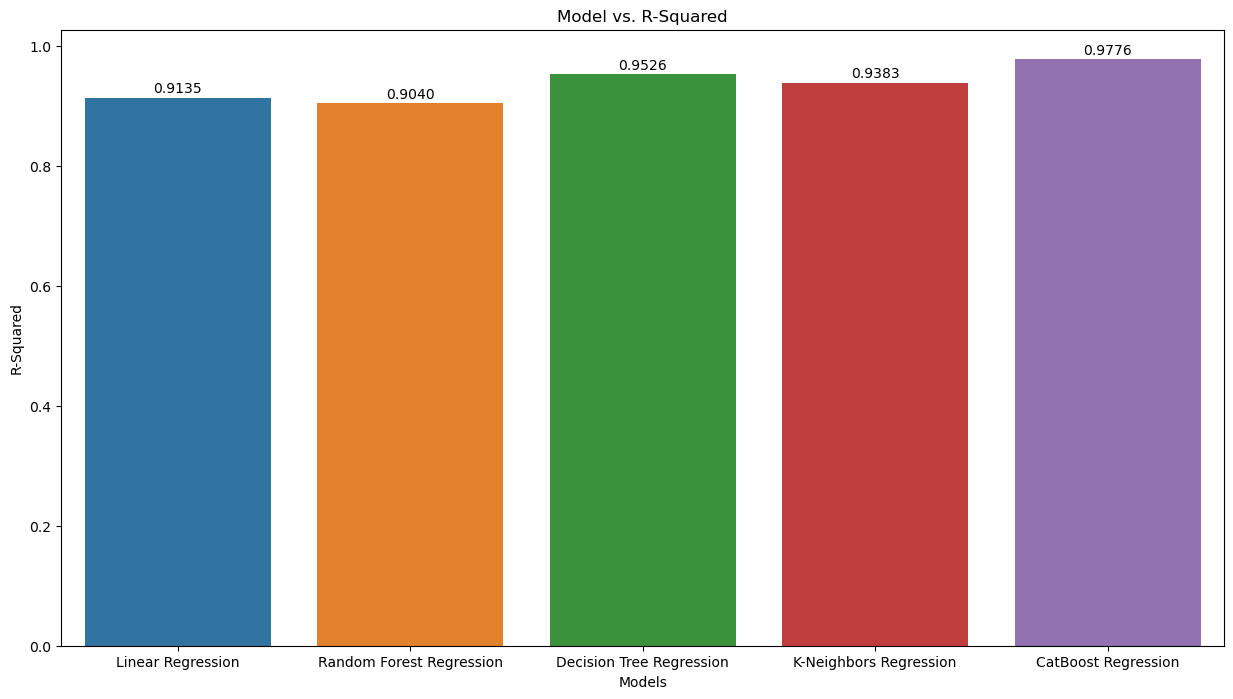

In [48]:
#Create bar graph to compare the R-squared by Models 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(r2_dict.keys()), y = list(r2_dict.values()))

for p, value in zip(ax.patches, list(r2_dict.values())):
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, f"{value:.4f}", ha = "center")

plt.xlabel("Models")
plt.ylabel("R-Squared")
plt.title("Model vs. R-Squared")

Text(0.5, 1.0, 'Model vs. MSE')

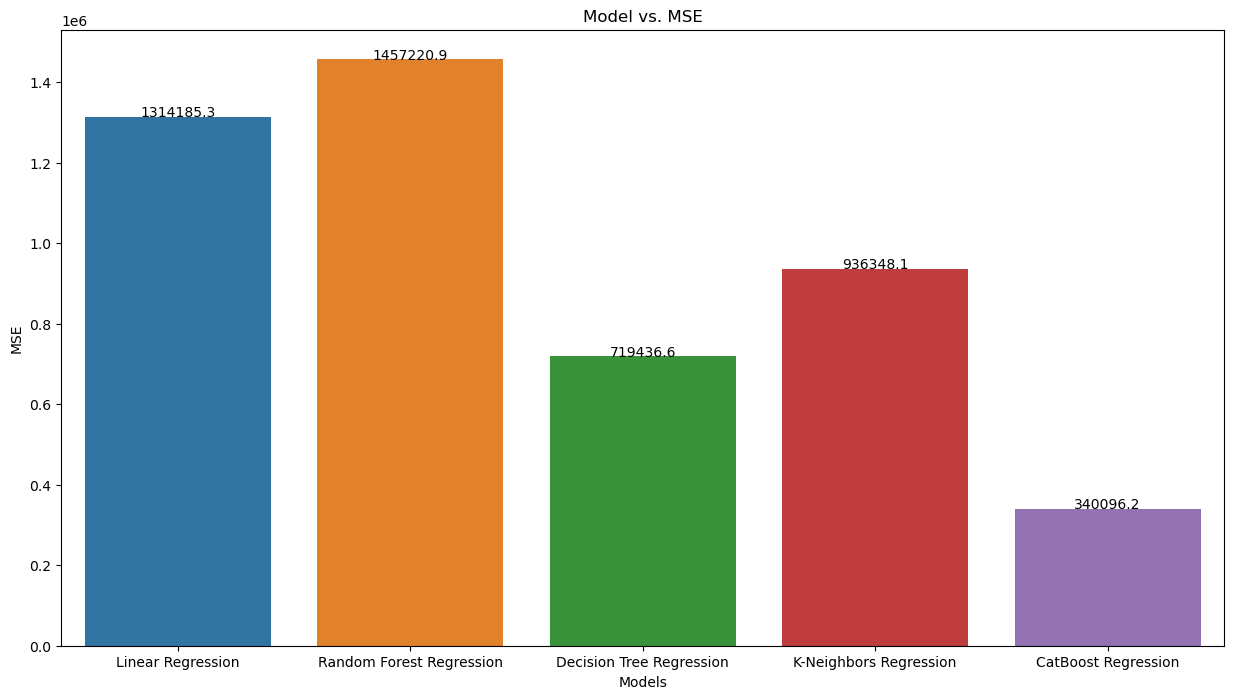

In [49]:
#Create bar graph to compare the MSE by Models 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(mse_dict.keys()), y = list(mse_dict.values()))

for p, value in zip(ax.patches, list(mse_dict.values())):
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, f"{value:.1f}", ha = "center")

plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("Model vs. MSE")

Text(0.5, 1.0, 'Model vs. MAE')

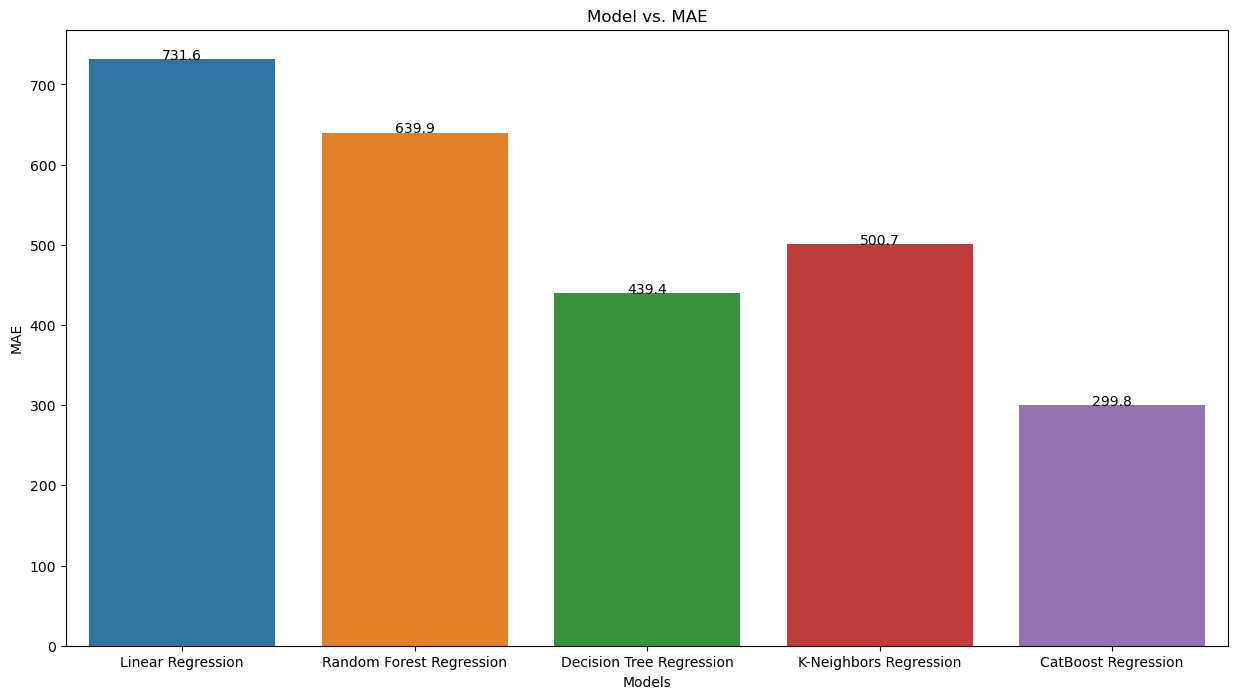

In [50]:
#Create bar graph to compare the MAE by Models 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(mae_dict.keys()), y = list(mae_dict.values()))

for p, value in zip(ax.patches, list(mae_dict.values())):
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, f"{value:.1f}", ha = "center")

plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("Model vs. MAE")

Text(0.5, 1.0, 'Model vs. MAPE')

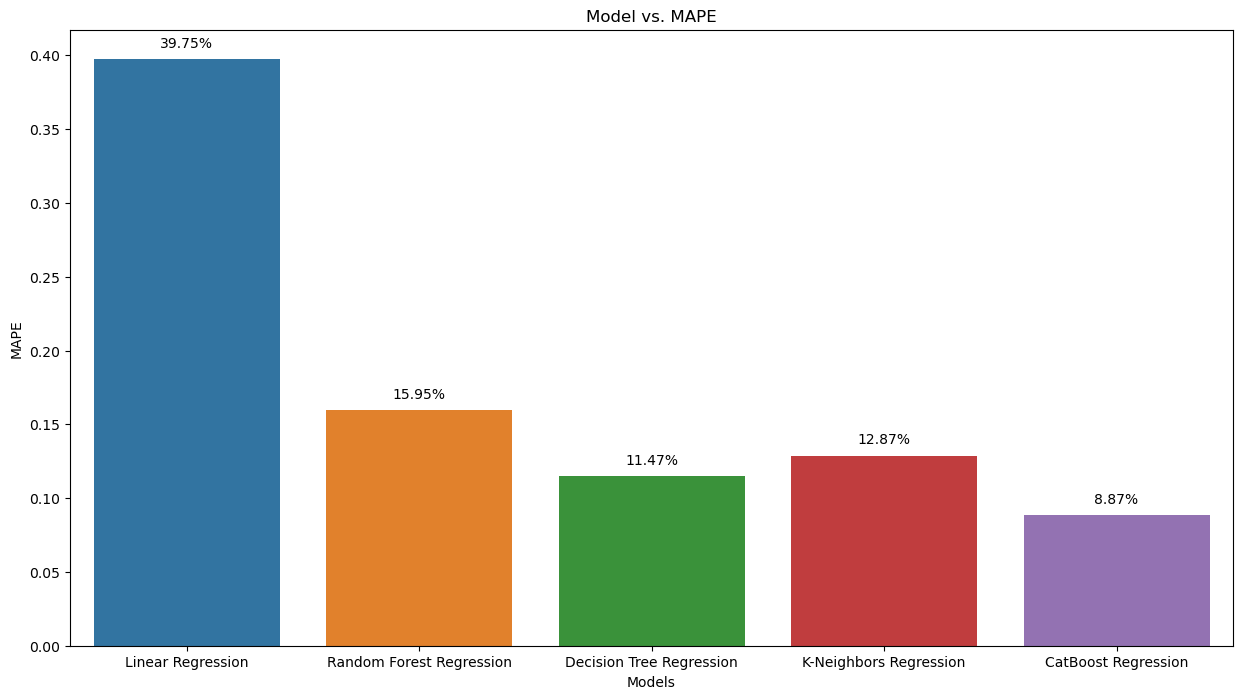

In [51]:
#Create bar graph to compare the MAPE by Models 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(mape_dict.keys()), y = list(mape_dict.values()))

for p, value in zip(ax.patches, list(mape_dict.values())):
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, f"{value*100:.2f}%", ha = "center")

plt.xlabel("Models")
plt.ylabel("MAPE")
plt.title("Model vs. MAPE")

Text(0.5, 1.0, 'Model vs. Cross Validation')

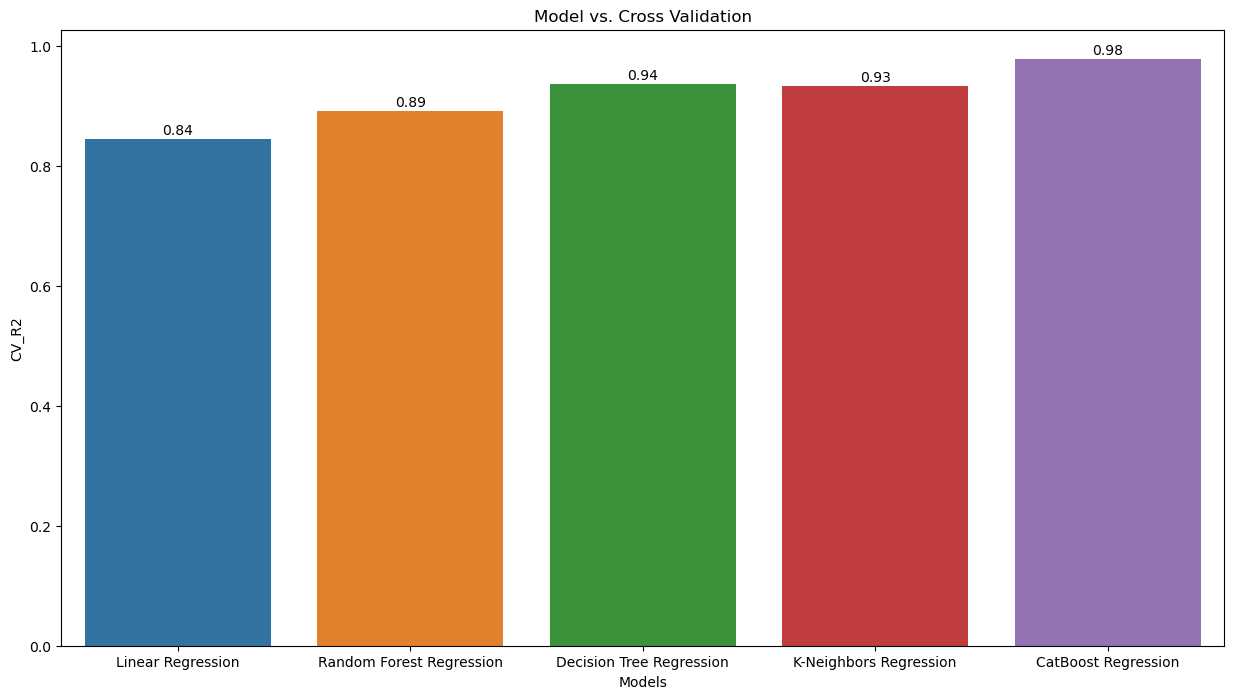

In [52]:
#Create bar graph to compare the Cross Valodation by Models 

plt.figure(figsize = (15,8))
ax = sns.barplot(x = list(cv_r2_dict.keys()), y = list(cv_r2_dict.values()))

for p, value in zip(ax.patches, list(cv_r2_dict.values())):
    _x = p.get_x() + p.get_width()/2
    _y = p.get_y() + p.get_height() + 0.008
    ax.text(_x, _y, f"{value:.2f}", ha = "center")

plt.xlabel("Models")
plt.ylabel("CV_R2")
plt.title("Model vs. Cross Validation")

In [53]:
listForModels = ["Linear Regression", "Random Forest Regression", "Decision Tree Regression", "K-Neighbors Regression", "CatBoost Regression"]
listForR2 = [r2LR, r2RF, r2DTR, r2KNR, r2CBR]
listForMSE = [mseLR, mseRF, mseDTR, mseKNR, mseCBR]
listForMAE = [maeLR, maeRF, maeDTR, maeKNR, maeCBR]
listForMAPE = [mapeLR, mapeRF, mapeDTR, mapeKNR, mapeCBR]
listForcv_r2 = [cv_r2_LR, cv_r2_RF, cv_r2_DTR, cv_r2_KNR, cv_r2_CBR]

# Create a DataFrame
df = pd.DataFrame({
    "Model Name": listForModels,
    "R-Squared": listForR2,
    "MSE": listForMSE,
    "MAE": listForMAE,
    "MAPE": listForMAPE,
    "Cross Validation R2": listForcv_r2
})

# Display the DataFrame
print(df)

                 Model Name  R-Squared           MSE         MAE      MAPE  \
0         Linear Regression   0.913468  1.314185e+06  731.629808  0.397456   
1  Random Forest Regression   0.904050  1.457221e+06  639.905333  0.159538   
2  Decision Tree Regression   0.952629  7.194366e+05  439.415333  0.114703   
3    K-Neighbors Regression   0.938347  9.363481e+05  500.671200  0.128746   
4       CatBoost Regression   0.977607  3.400962e+05  299.812158  0.088723   

   Cross Validation R2  
0             0.844584  
1             0.892239  
2             0.937173  
3             0.933223  
4             0.978393  
